In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# right-hand side of ODE

def f(r, X, eps):
    f1 = X[1]
    f2 = -2*X[1]/r + 2*(X[2] - eps)*X[0]
    f3 = X[3]
    f4 = -2*X[3]/r + np.power(X[0],2)
    return np.array([f1, f2, f3, f4])

# interval of solution and number of steps
ri, rf = 0, 100
steps = 1000
dr = (rf - ri)/steps
rinterv = np.linspace(ri, rf, steps, endpoint=True)

# single step of RK4
def rk4step(r, X, eps):
    k1 = dr*f(r, X, eps)
    k2 = dr*f(r + dr/2, X + k1/2, eps)
    k3 = dr*f(r + dr/2, X + k2/2, eps)
    k4 = dr*f(r + dr, X + k3, eps)
    return X + (k1 + 2*k2 + 2*k3 + k4)/6

def rk4(Xbc, w):
    # initialize the arrays
    Xs = np.zeros((4, steps))

    # boundary conditions
    Xs[..., 0] = Xbc

    # perform RK4
    for step in np.arange(1, steps):
        rnow = rinterv[step]
        Xs[..., step] = rk4step(rnow, Xs[..., step - 1], eps)

    return Xs

C:\Users\gsali\AppData\Local\Temp/ipykernel_9472/3944738608.py:5: RuntimeWarning: overflow encountered in double_scalars
  f2 = -2*X[1]/r + 2*(X[2] - eps)*X[0]
C:\Users\gsali\AppData\Local\Temp/ipykernel_9472/3944738608.py:7: RuntimeWarning: overflow encountered in power
  f4 = -2*X[3]/r + np.power(X[0],2)
C:\Users\gsali\AppData\Local\Temp/ipykernel_9472/3944738608.py:5: RuntimeWarning: invalid value encountered in double_scalars
  f2 = -2*X[1]/r + 2*(X[2] - eps)*X[0]
C:\Users\gsali\AppData\Local\Temp/ipykernel_9472/3944738608.py:7: RuntimeWarning: invalid value encountered in double_scalars
  f4 = -2*X[3]/r + np.power(X[0],2)


Text(0, 0.5, 'theta')

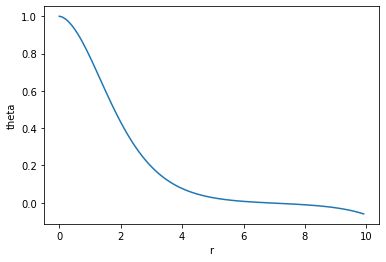

In [34]:
eps = -0.692
phi0 = -1.341
Xbc = np.array([1, 0, phi0, 0])

Xs = rk4(Xbc, eps)
plt.plot(rinterv[:100], Xs[0].T[:100])
plt.xlabel("r")
plt.ylabel("theta")